In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../offers.csv')
df.punk_id = df.punk_id.astype(int)
df.drop('Unnamed: 0',axis=1,inplace=True)
df['Txn'] = df['Txn'].astype('datetime64')
#df.set_index('punk_id',inplace=True)
df.head()

,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars
0,250Ξ ($1.03M),0x983ace,NaN,2021-05-10,Bid Withdrawn,0,250.0,1030000.0
1,"250Ξ ($537,615)",0x983ace,NaN,2021-04-11,Bid,0,250.0,537615.0
2,"100Ξ ($160,973)",0xd7510a,NaN,2021-03-03,Bid Withdrawn,0,100.0,160973.0
3,"100Ξ ($188,897)",0xd7510a,NaN,2021-02-20,Bid,0,100.0,188897.0
4,"69Ξ ($25,532)",natealex,NaN,2020-09-16,Bid Withdrawn,0,69.0,25532.0


In [3]:
df.shape

(92823, 8)

In [4]:
punks = pd.read_csv('../Fase1_ETL/to_database/raw_punks.csv')
punks.drop('Unnamed: 0',axis=1,inplace=True)
#punks.set_index('id',inplace=True)

In [5]:
punks.head()

,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
1,1,Male,4352,Dark,2,"Mohawk,Smile",0,NaN
2,2,Female,8090,Light,1,Wild Hair,0,NaN
3,3,Male,7896,Dark,3,"Nerd Glasses,Pipe,Wild Hair",0,NaN
4,4,Male,7332,Mid,4,"Big Shades,Earring,Goat,Wild Hair",0,NaN


In [6]:
punks.shape,df.shape

((10000, 8), (92823, 8))

In [7]:
aggregated_df = df.merge(punks, how='left',left_on='punk_id',right_on='id',left_index=False, right_index=False, sort=False)
aggregated_df.head()

,Amount,From,To,Txn,Type,punk_id,amount_ethereum,amount_dollars,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,250Ξ ($1.03M),0x983ace,NaN,2021-05-10,Bid Withdrawn,0,250.0,1030000.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
1,"250Ξ ($537,615)",0x983ace,NaN,2021-04-11,Bid,0,250.0,537615.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
2,"100Ξ ($160,973)",0xd7510a,NaN,2021-03-03,Bid Withdrawn,0,100.0,160973.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
3,"100Ξ ($188,897)",0xd7510a,NaN,2021-02-20,Bid,0,100.0,188897.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
4,"69Ξ ($25,532)",natealex,NaN,2020-09-16,Bid Withdrawn,0,69.0,25532.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring


In [8]:
aggregated_df.shape

(92823, 16)

In [9]:
aggregated_df.Type.unique()

array(['Bid Withdrawn', 'Bid', 'Sold', 'Offered'], dtype=object)

In [10]:
# get punks who have been sold
sold = aggregated_df[aggregated_df.Type == 'Sold']

In [11]:
df_sold = sold[['punk_id','Txn','amount_ethereum','types','skin','rarity','traits','total_traits']].reset_index(drop=True)

In [12]:
df_sold.head()

,punk_id,Txn,amount_ethereum,types,skin,rarity,traits,total_traits
0,0,2018-11-30,25.00,Female,Mid,2023,"Blonde Bob,Earring,Green Eye Shadow",3
1,0,2017-07-07,1.60,Female,Mid,2023,"Blonde Bob,Earring,Green Eye Shadow",3
2,0,2017-06-23,0.98,Female,Mid,2023,"Blonde Bob,Earring,Green Eye Shadow",3
3,1,2020-11-30,60.00,Male,Dark,4352,"Mohawk,Smile",2
4,1,2019-04-06,31.00,Male,Dark,4352,"Mohawk,Smile",2


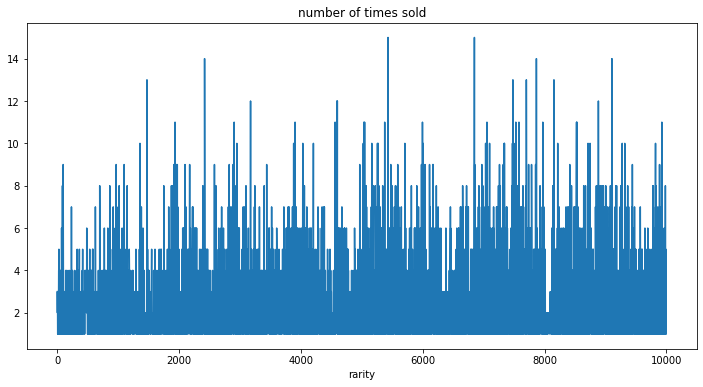

In [13]:
plt.subplots(figsize=(12,6))
df_sold.sort_values(by='rarity').groupby('rarity').count()['types'].plot()
plt.title ('number of times sold')
plt.show()

In [14]:
df_count_sold = df_sold.groupby('punk_id')['types'].count().to_frame(name='total_sold')
df_median_price = df_sold.groupby('punk_id')['amount_ethereum'].mean().to_frame(name='avg_sold_price')
df_max_price = df_sold.groupby('punk_id')['amount_ethereum'].max().to_frame(name='max_sold_price')

In [15]:
df_counts = pd.concat([df_count_sold,df_median_price,df_max_price,punks],axis=1)
df_counts.head(2)

,total_sold,avg_sold_price,max_sold_price,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,3.0,9.193333,25.0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
1,3.0,30.473333,60.0,1,Male,4352,Dark,2,"Mohawk,Smile",0,NaN


In [16]:
df_counts = df_counts[['id','total_sold','avg_sold_price','max_sold_price','types','rarity','skin','traits','total_traits']]

In [17]:
df_counts[df_counts.id == 2201]

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits
2201,2201,NaN,NaN,NaN,Female,136,Mid,"Choker,Frumpy Hair",2


In [18]:
#df_counts.fillna(0,inplace=True)
df_counts.dropna(inplace=True) # remove those who have not been sold
df_counts.head(10)

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits
0,0,3.0,9.193333,25.00,Female,2023,Mid,"Blonde Bob,Earring,Green Eye Shadow",3
1,1,3.0,30.473333,60.00,Male,4352,Dark,"Mohawk,Smile",2
14,14,3.0,1.750000,2.50,Female,155,Dark,"Hot Lipstick,Pilot Helmet,Pipe",3
33,33,1.0,0.510000,0.51,Male,7635,Light,Peak Spike,1
53,53,2.0,21.000000,22.00,Female,2825,Light,"Big Shades,Straight Hair",2
89,89,3.0,13.830000,20.00,Female,125,Dark,Choker,1
116,116,2.0,1.800000,2.40,Female,220,Dark,"Black Lipstick,Clown Eyes Blue,Earring,Tiara",4
118,118,2.0,20.350000,20.45,Female,9954,Light,"Bandana,Black Lipstick",2
124,124,3.0,17.300000,19.90,Male,6760,Mid,"Earring,Normal Beard Black,Peak Spike",3
138,138,4.0,14.925000,15.95,Male,9806,Light,"Horned Rim Glasses,Stringy Hair",2


In [19]:
df_counts.to_csv('../Fase3_ML/dataset.csv')

In [20]:
df_counts[df_counts.rarity == 2] # punk id 2 has never been sold

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits


In [21]:
# vamos a analizar la venta de los mas raros
df_raros = df_counts[df_counts.rarity<101].sort_values(by = 'rarity')
df_otros = df_counts[df_counts.rarity>101].sort_values(by = 'rarity')
print(df_raros.shape,df_otros.shape)

(65, 9) (5549, 9)


In [22]:
print(df_raros[['avg_sold_price']].describe().round(2))
print(df_otros[['avg_sold_price']].describe().round(2))

       avg_sold_price
count           65.00
mean           124.59
std            367.97
min              0.05
25%              2.28
50%             30.24
75%             88.50
max           2106.00
       avg_sold_price
count         5549.00
mean            14.06
std             21.28
min              0.00
25%              0.92
50%              8.80
75%             20.93
max            500.00


In [23]:
df_raros['tipo'] = df_raros.types.map({'Male':'humano','Female':'humano','Ape':'rest','Zombie':'rest','Alien':'rest'})
df_raros

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits,tipo
8348,8348,3.0,37.633333,85.0,Male,1,Mid,"Big Beard,Buck Teeth,Cigarette,Classic Shades,...",7,humano
7523,7523,1.0,8.000000,8.0,Alien,11,Alien,"Earring,Knitted Cap,Medical Mask",3,rest
7804,7804,2.0,2106.000000,4200.0,Alien,12,Alien,"Cap Forward,Pipe,Small Shades",3,rest
2890,2890,2.0,306.500000,605.0,Alien,14,Alien,Cap,1,rest
3100,3100,2.0,2104.000000,4200.0,Alien,15,Alien,Headband,1,rest
...,...,...,...,...,...,...,...,...,...,...
9703,9703,1.0,2.500000,2.5,Male,94,Dark,"Beanie,Mole",2,humano
8562,8562,9.0,42.067778,105.0,Male,96,Dark,"Beanie,Earring",2,humano
5684,5684,4.0,13.625000,44.0,Female,98,Dark,"Choker,Pilot Helmet",2,humano
5787,5787,1.0,2.100000,2.1,Female,99,Mid,"Black Lipstick,Choker,Purple Eye Shadow,Tiara",4,humano


In [24]:
df_raros.total_sold.unique()

array([3., 1., 2., 4., 5., 6., 8., 9.])

In [25]:
df_raros[df_raros.avg_sold_price < 0]

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits,tipo


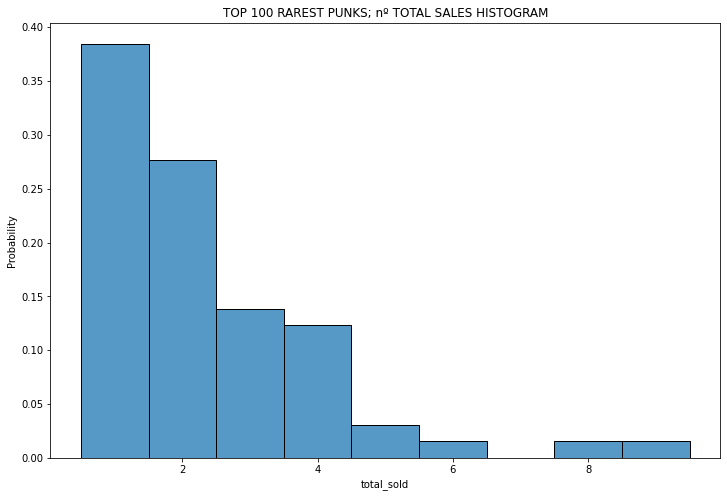

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits,tipo
8348,8348,3.0,37.633333,85.0,Male,1,Mid,"Big Beard,Buck Teeth,Cigarette,Classic Shades,...",7,humano
7523,7523,1.0,8.000000,8.0,Alien,11,Alien,"Earring,Knitted Cap,Medical Mask",3,rest
7804,7804,2.0,2106.000000,4200.0,Alien,12,Alien,"Cap Forward,Pipe,Small Shades",3,rest
2890,2890,2.0,306.500000,605.0,Alien,14,Alien,Cap,1,rest
3100,3100,2.0,2104.000000,4200.0,Alien,15,Alien,Headband,1,rest
...,...,...,...,...,...,...,...,...,...,...
9703,9703,1.0,2.500000,2.5,Male,94,Dark,"Beanie,Mole",2,humano
8562,8562,9.0,42.067778,105.0,Male,96,Dark,"Beanie,Earring",2,humano
5684,5684,4.0,13.625000,44.0,Female,98,Dark,"Choker,Pilot Helmet",2,humano
5787,5787,1.0,2.100000,2.1,Female,99,Mid,"Black Lipstick,Choker,Purple Eye Shadow,Tiara",4,humano


In [26]:
fig,ax = plt.subplots(figsize=(12,8))
sns.histplot(data=df_raros['total_sold'],bins=50,stat='probability',ax=ax,discrete=True)
plt.title ('TOP 100 RAREST PUNKS; nº TOTAL SALES HISTOGRAM')
plt.show()
df_raros

In [27]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    print(f'25% at {Q1}, and 75% at {Q3}')
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [28]:
variable_to_explore = 'avg_sold_price'
#variable_to_explore = 'max_sold_price'

In [29]:
mediana = df_raros[variable_to_explore].mean()
std = df_raros[variable_to_explore].std()
perc_75 = df_raros[variable_to_explore].quantile(.75)
print(mediana,std,perc_75)
upper_raros, lower = outliers(df_raros, variable_to_explore)
print(upper_raros,lower)

124.59248632478632 367.9736813865542 88.5
25% at 2.2780000000000005, and 75% at 88.5
217.833 -127.05499999999999


fig,ax = plt.subplots(figsize=(16,9))
sns.histplot(data=df_raros.avg_bid_price,bins=50,stat='frequency',ax=ax)
plt.show()

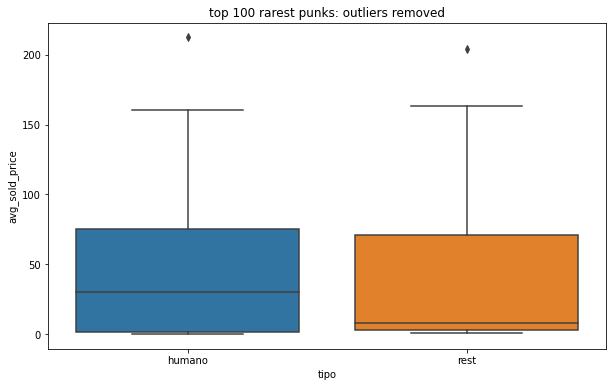

In [30]:
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(x="tipo", y=variable_to_explore,data=df_raros[~(df_raros[variable_to_explore]>upper_raros)],ax=ax)
sns.catplot
plt.title('top 100 rarest punks: outliers removed')
#plt.ylim([0,900])
plt.show()

In [31]:
mediana = df_otros[variable_to_explore].mean()
std = df_otros[variable_to_explore].std()
perc_75 = df_otros[variable_to_explore].quantile(0.75)
print(mediana,std,perc_75)
upper_otros, lower = outliers(df_otros, variable_to_explore)
print(upper_otros,lower)

14.060171419327801 21.28429411395847 20.933333333333334
25% at 0.9199999999999999, and 75% at 20.933333333333334
50.95333333333333 -29.1


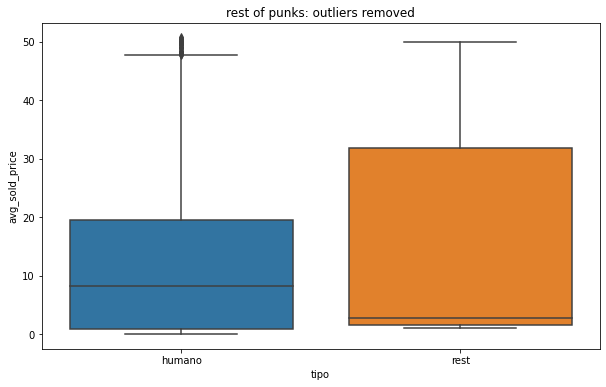

In [32]:
fig,ax = plt.subplots(figsize=(10,6))
#display(df_otros.head())
#display(df_otros.types.unique())
df_otros['tipo'] = df_otros.types.map({'Male':'humano','Female':'humano','Ape':'rest','Zombie':'rest','Alien':'rest'})
sns.boxplot(x="tipo", y=variable_to_explore,data=df_otros[~(df_otros[variable_to_explore]>upper_otros)],ax=ax)
plt.title('rest of punks: outliers removed')
#plt.ylim([0,900])
plt.show()

In [33]:
data1 = df_raros[~(df_raros[variable_to_explore]>upper_raros)][variable_to_explore]

data2 = df_otros[~(df_otros[variable_to_explore]>upper_otros)][variable_to_explore]

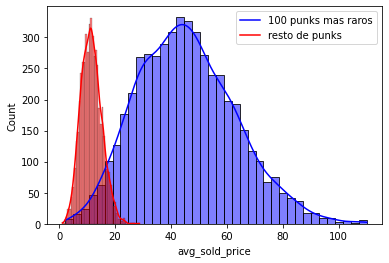

In [34]:
# Segun la teoria del Central Limit Theory (CLT), la media de las muestras tiene una distrubucion Normal

def get_means_of_price(data):
    means_price = []
    for i in range(5000):
        price_samples= data.sample(n=10, replace=True) # take a sample of 300 values with replacement
        means_price.append(price_samples.mean())
    return means_price

sns.histplot(get_means_of_price(data1),color='blue',kde=True,alpha=0.5)  
sns.histplot(get_means_of_price(data2),color = 'red',kde=True)  
plt.xlabel('avg_sold_price')
plt.legend(['100 punks mas raros','resto de punks'])

In [35]:
from scipy.stats import ttest_ind

In [36]:
res = ttest_ind(a=data1,b=data2)
print(res)

Ttest_indResult(statistic=20.185895167592644, pvalue=2.0043920874118916e-87)


In [37]:
alpha = 0.05    
print(f'P-value is {round(res.pvalue*100,2)}% and significance level (alpha) is 5% ')
if res.pvalue < alpha:
    print('WE reject NULL hypothesis that both dist are equal')
else:
    print('WE cannot reject NULL hypothesis that both distributions are equal')


P-value is 0.0% and significance level (alpha) is 5% 
WE reject NULL hypothesis that both dist are equal


In [38]:
# vamos a analizar la venta de los mas vendidos

In [39]:
df_top_ventas = df_counts.sort_values(by='total_sold',ascending=False)[:100]
df_otros = df_counts.sort_values(by='total_sold',ascending=False)[100:]

In [40]:
df_counts.sort_values(by='total_sold',ascending=False).set_index('id')['total_sold'][:100].index

Int64Index([2937, 9117, 8508, 5287, 7072, 5705, 9335, 3914, 8970, 6523, 8389,
            4631, 9089, 8586, 6397, 6276, 8436, 1791, 4253, 5965, 4261, 1737,
            4632, 9922, 4960, 3306, 6936, 7281, 2907, 8919, 8512, 3565, 4241,
            6672, 7443, 8871, 2998, 7435, 2043, 5635, 9350, 4808, 5354, 4174,
            7005, 2317, 5275, 2125, 6230, 6303, 3654, 2390, 5575, 5559, 6654,
            7094, 4770, 5366, 3782, 9507, 4861, 3771, 4951, 6989,  639, 7608,
            6094, 3421, 2238, 7575, 8562, 2135, 6160, 3553, 6550, 8696, 2832,
            2942, 8861, 4036, 5752, 8946, 3576, 6531, 4111, 5209, 5020, 3533,
            2856, 3114, 4824, 9447, 6863, 2677,  441, 9856, 4046, 4878, 9539,
            2860],
           dtype='int64', name='id')

In [41]:
print(variable_to_explore)
upper_ventas, lower = outliers(df_top_ventas, variable_to_explore)
print(upper_ventas,lower)

avg_sold_price
25% at 4.754944444444445, and 75% at 10.901893939393938
20.12231818181818 -4.465479797979795


In [42]:
df_top_ventas.head()

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits
2937,2937,15.0,7.058000,22.22,Female,5431,Dark,"Purple Eye Shadow,Purple Lipstick,Stringy Hair",3
9117,9117,15.0,4.760667,21.50,Male,6849,Light,"Earring,Mohawk Thin,Normal Beard Black",3
8508,8508,14.0,5.557143,22.00,Male,9107,Light,"Classic Shades,Earring,Mohawk Thin",3
5287,5287,14.0,4.239286,7.89,Male,7867,Mid,"Eye Patch,Mohawk Thin,Pipe",3
7072,7072,14.0,10.547857,29.00,Male,2418,Mid,"Cigarette,Vampire Hair",2


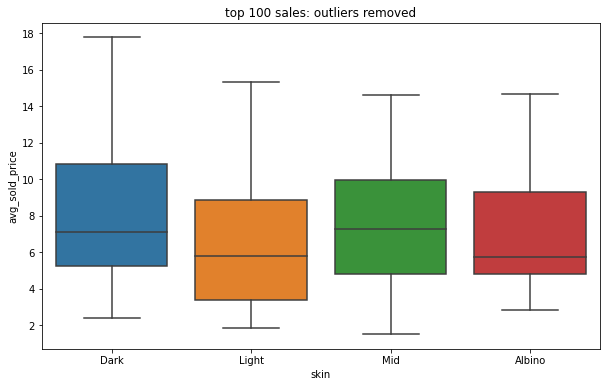

In [43]:
fig,ax = plt.subplots(figsize=(10,6))
#display(df_otros.head())
#display(df_otros.types.unique())
sns.boxplot(x='skin',y=variable_to_explore,data=df_top_ventas[~(df_top_ventas[variable_to_explore]>upper_ventas)],ax=ax)
plt.title('top 100 sales: outliers removed')
#plt.ylim([0,900])
plt.show()

In [44]:
print(variable_to_explore)
upper_otros, lower = outliers(df_otros, variable_to_explore)
print(upper_otros,lower)

avg_sold_price
25% at 0.895, and 75% at 21.1125
51.43875 -29.431250000000002


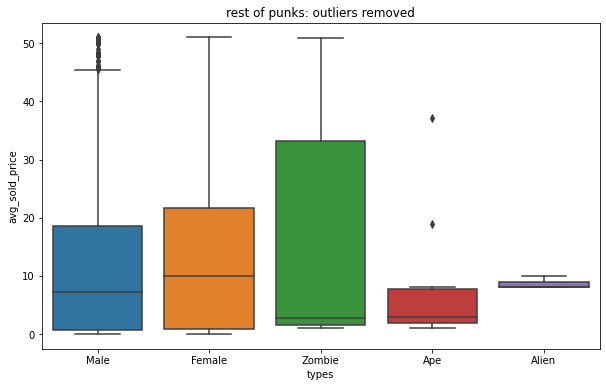

In [45]:
fig,ax = plt.subplots(figsize=(10,6))
#display(df_otros.head())
#display(df_otros.types.unique())
sns.boxplot(x="types", y=variable_to_explore,data=df_otros[~(df_otros[variable_to_explore]>upper_otros)],ax=ax)
plt.title('rest of punks: outliers removed')
#plt.ylim([0,900])
plt.show()

In [46]:
data1 = df_top_ventas[~(df_top_ventas[variable_to_explore]>upper_raros)][variable_to_explore]

data2 = df_otros[~(df_otros[variable_to_explore]>upper_otros)][variable_to_explore]


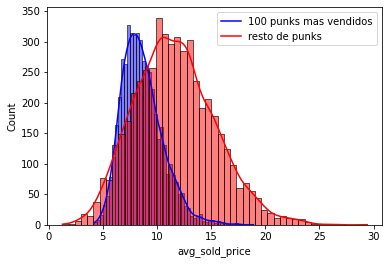

In [47]:
sns.histplot(get_means_of_price(data1),color='blue',kde=True,alpha=0.5)  
sns.histplot(get_means_of_price(data2),color = 'red',kde=True)  
plt.xlabel('avg_sold_price')
plt.legend(['100 punks mas vendidos','resto de punks'])

In [48]:
res = ttest_ind(a=data1,b=data2)
print(res)

Ttest_indResult(statistic=-2.47636364072623, pvalue=0.013303252418371781)


In [49]:
alpha = 0.05    
print(f'P-value is {round(res.pvalue*100,2)}% and significance level (alpha) is 5% ')
if res.pvalue < alpha:
    print('reject NULL hypothesis that both dist are equal')
else:
    print('cannot reject NULL hypothesis that both dist are equal')


P-value is 1.33% and significance level (alpha) is 5% 
reject NULL hypothesis that both dist are equal


In [50]:
# vamos a analizar la venta de los mas caros

In [51]:
variable_to_explore = 'avg_sold_price'

In [52]:
df_top_caros = df_counts.sort_values(by='avg_sold_price',ascending=False)[:100]
df_otros = df_counts.sort_values(by='avg_sold_price',ascending=False)[100:]

In [53]:
df_top_caros

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits
7804,7804,2.0,2106.000,4200.00,Alien,12,Alien,"Cap Forward,Pipe,Small Shades",3
3100,3100,2.0,2104.000,4200.00,Alien,15,Alien,Headband,1
2140,2140,2.0,575.000,750.00,Ape,50,Ape,"Knitted Cap,Small Shades",2
3393,3393,1.0,500.000,500.00,Zombie,506,Zombie,"Crazy Hair,Frown",2
2066,2066,1.0,500.000,500.00,Zombie,535,Zombie,Knitted Cap,1
...,...,...,...,...,...,...,...,...,...
9400,9400,2.0,72.345,75.00,Female,1573,Light,"Pipe,Purple Lipstick,VR,Wild Blonde",4
8686,8686,3.0,71.330,101.00,Male,3395,Dark,"Gold Chain,Hoodie",2
8445,8445,2.0,70.440,80.88,Male,4225,Mid,"Big Shades,Hoodie,Normal Beard,Smile",4
9376,9376,1.0,70.000,70.00,Female,293,Dark,"Horned Rim Glasses,Orange Side,Purple Lipstick",3


In [54]:
print(variable_to_explore)
upper_ventas, lower = outliers(df_top_caros, variable_to_explore)
print(upper_ventas,lower)

avg_sold_price
25% at 80.0, and 75% at 139.52
228.8 -9.280000000000015


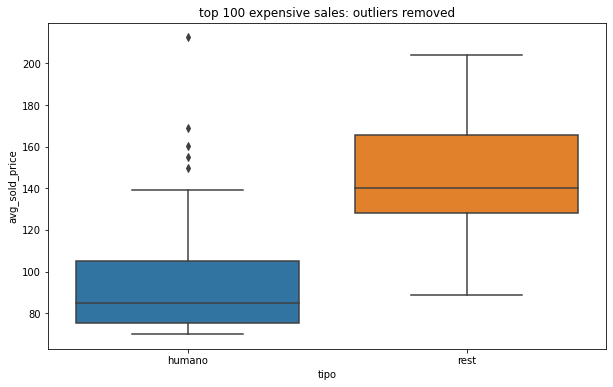

In [55]:
fig,ax = plt.subplots(figsize=(10,6))
#display(df_otros.head())
#display(df_otros.types.unique())
df_top_caros['tipo'] = df_top_caros.types.map({'Male':'humano','Female':'humano','Ape':'rest','Zombie':'rest','Alien':'rest'})
sns.boxplot(x='tipo',y=variable_to_explore,data=df_top_caros[~(df_top_caros[variable_to_explore]>upper_ventas)],ax=ax)
plt.title('top 100 expensive sales: outliers removed')
#plt.ylim([0,900])
plt.show()

In [56]:
print(variable_to_explore)
upper_otros, lower = outliers(df_otros, variable_to_explore)
print(upper_otros,lower)

avg_sold_price
25% at 0.895, and 75% at 20.275
49.345 -28.175


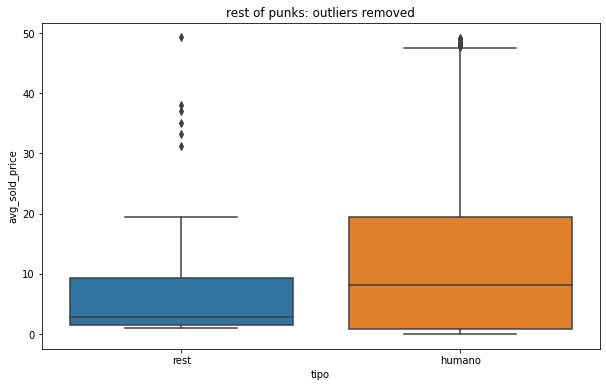

In [57]:
fig,ax = plt.subplots(figsize=(10,6))
#display(df_otros.head())
#display(df_otros.types.unique())
df_otros['tipo'] = df_otros.types.map({'Male':'humano','Female':'humano','Ape':'rest','Zombie':'rest','Alien':'rest'})
sns.boxplot(x="tipo", y=variable_to_explore,data=df_otros[~(df_otros[variable_to_explore]>upper_otros)],ax=ax)
plt.title('rest of punks: outliers removed')
#plt.ylim([0,900])
plt.show()

In [58]:
data1 = df_top_caros[~(df_top_caros[variable_to_explore]>upper_ventas)][variable_to_explore]

data2 = df_otros[~(df_otros[variable_to_explore]>upper_otros)][variable_to_explore]


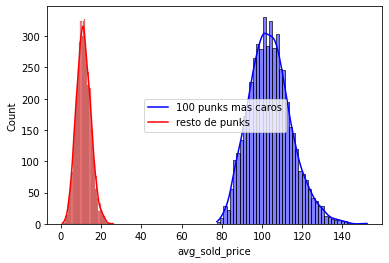

In [59]:
sns.histplot(get_means_of_price(data1),color='blue',kde=True,alpha=0.5)  
sns.histplot(get_means_of_price(data2),color = 'red',kde=True)  
plt.xlabel('avg_sold_price')
plt.legend(['100 punks mas caros','resto de punks'])

In [60]:
res = ttest_ind(a=data1,b=data2)
print(res)
alpha = 0.05    
print(f'P-value is {round(res.pvalue*100,2)}% and significance level (alpha) is 5% ')
if res.pvalue < alpha:
    print('reject NULL hypothesis that both dist are equal')
else:
    print('cannot reject NULL hypothesis that both dist are equal')

Ttest_indResult(statistic=72.00790001724096, pvalue=0.0)
P-value is 0.0% and significance level (alpha) is 5% 
reject NULL hypothesis that both dist are equal


In [ ]:
# analizamos nº de traits con el precio

In [100]:
df_counts.total_traits.value_counts()

3    2616
2    1959
4     819
1     118
5      95
6       7
7       1
Name: total_traits, dtype: int64

In [131]:
df_humanos = df_counts[(df_counts.types =='Female') | (df_counts.types == 'Male')]
df_no_humanos = df_counts[(df_counts.types =='Alien') | (df_counts.types == 'Zombie') | (df_counts.types == 'Ape')]

In [133]:
df_humanos.types.unique()

array(['Female', 'Male'], dtype=object)

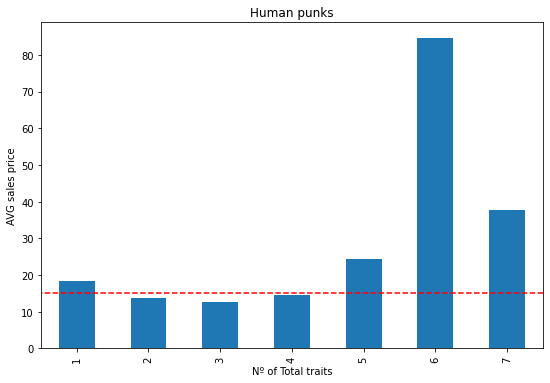

In [168]:
fig, ax = plt.subplots(figsize=(9,6))
df_humanos.groupby('total_traits')[['avg_sold_price']].mean().plot(kind='bar',legend=False,ax=ax)
plt.ylabel('AVG sales price')
plt.xlabel('Nº of Total traits')
plt.hlines(15,-1,7, color='red',linestyles='dashed')
plt.title('Human punks')
plt.show()

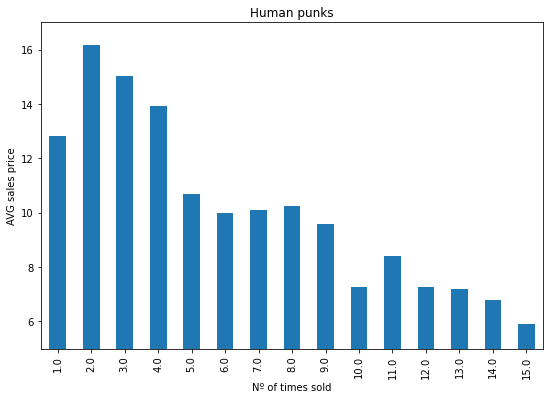

In [171]:
fig, ax = plt.subplots(figsize=(9,6))
df_humanos.groupby('total_sold')[['avg_sold_price']].mean().sort_values(by='total_sold').plot(kind='bar',legend=False,ax=ax)
plt.ylabel('AVG sales price')
plt.xlabel('Nº of times sold')
plt.ylim([5,17])
plt.title('Human punks')
plt.show()

In [183]:
# vamos a analizar que traits tienen los mas caros
df_top_caros = df_counts.sort_values(by='avg_sold_price',ascending=False)[:100]
df_otros = df_counts.sort_values(by='avg_sold_price',ascending=False)[100:]

In [184]:
def convert_str2list(text):
    #print(text)
    try:
        items = text.split(',')        
        return items
    except:
        return 'None'
    
#df1.traits.apply(convert_str2list)
convert_str2list('Blonde Bob,Earring,Green Eye Shadow')

['Blonde Bob', 'Earring', 'Green Eye Shadow']

In [187]:
df_top_caros

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits
7804,7804,2.0,2106.000,4200.00,Alien,12,Alien,"[Cap Forward, Pipe, Small Shades]",3
3100,3100,2.0,2104.000,4200.00,Alien,15,Alien,[Headband],1
2140,2140,2.0,575.000,750.00,Ape,50,Ape,"[Knitted Cap, Small Shades]",2
3393,3393,1.0,500.000,500.00,Zombie,506,Zombie,"[Crazy Hair, Frown]",2
2066,2066,1.0,500.000,500.00,Zombie,535,Zombie,[Knitted Cap],1
...,...,...,...,...,...,...,...,...,...
9400,9400,2.0,72.345,75.00,Female,1573,Light,"[Pipe, Purple Lipstick, VR, Wild Blonde]",4
8686,8686,3.0,71.330,101.00,Male,3395,Dark,"[Gold Chain, Hoodie]",2
8445,8445,2.0,70.440,80.88,Male,4225,Mid,"[Big Shades, Hoodie, Normal Beard, Smile]",4
9376,9376,1.0,70.000,70.00,Female,293,Dark,"[Horned Rim Glasses, Orange Side, Purple Lipst...",3


In [186]:
df_top_caros.traits = df_top_caros['traits'].apply(convert_str2list)

In [188]:
df_otros.traits = df_otros['traits'].apply(convert_str2list)

In [192]:
df_exploded =df_top_caros.explode('traits')
df_exploded.reset_index(inplace=True)
df_exploded['_helper'] = 1

df_wide = df_exploded.pivot(index='index', columns='traits',values='_helper')
df_wide.fillna(0,inplace=True)

df1 = pd.concat([df_top_caros,df_wide],axis=1)
df1.drop('traits',axis=1,inplace=True)
df1

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,total_traits,3D Glasses,Bandana,Beanie,Big Shades,Black Lipstick,Buck Teeth,Cap,Cap Forward,Chinstrap,Choker,Cigarette,Classic Shades,Clown Eyes Blue,Clown Eyes Green,Clown Hair Green,Clown Nose,Cowboy Hat,Crazy Hair,Do-rag,Earring,Eye Mask,Eye Patch,Fedora,Frown,Gold Chain,Green Eye Shadow,Handlebars,Headband,Hoodie,Horned Rim Glasses,Hot Lipstick,Knitted Cap,Luxurious Beard,Messy Hair,Mohawk Thin,Mole,Mustache,Muttonchops,Nerd Glasses,Normal Beard,Normal Beard Black,Orange Side,Peak Spike,Pigtails,Pilot Helmet,Pipe,Purple Eye Shadow,Purple Hair,Purple Lipstick,Regular Shades,Rosy Cheeks,Shadow Beard,Silver Chain,Small Shades,Smile,Spots,Straight Hair Blonde,Stringy Hair,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair
143,143,3.0,117.166667,180.00,Male,91,Light,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
407,407,2.0,88.000000,90.00,Female,1713,Light,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
824,824,3.0,89.000000,200.00,Male,92,Dark,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
877,877,2.0,78.350000,85.00,Male,4850,Light,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
920,920,3.0,82.996667,99.99,Male,1892,Light,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9650,9650,1.0,108.000000,108.00,Female,1564,Mid,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9749,9749,4.0,75.195000,100.00,Male,62,Mid,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9844,9844,2.0,85.500000,90.00,Female,171,Mid,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9932,9932,1.0,75.000000,75.00,Female,2524,Light,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
#get traits 
def get_traits(dataframe,column):
    traits ={}
    for items in dataframe[column].str.split(','):
        for elem in items:        
            if len(elem) ==0:
                #print(type(elem))
                continue            
            if elem in traits:
                #print('exists, add one')
                traits[elem] += 1
            else:
                #print('not exist, create set to one ')
                traits[elem] = 1n
    return traits
    

In [63]:
columna = 'traits'
traits_caros = get_traits(df_top_caros,columna)
traits_rest = get_traits(df_otros,columna)

In [64]:
order_traits_caros = dict(sorted(traits_caros.items(),key= lambda x:x[1],reverse=True))
df_traits_caros = pd.DataFrame(list(order_traits_caros.items()),columns = ['trait','occurences'])
#df_traits_humans[df_traits_humans.occurences > 1]

traits_caros = set (df_traits_caros.trait.values)
len(traits_caros),df_traits_caros.head()

(66,
         trait  occurences
 0     Earring          33
 1   Cigarette          14
 2  3D Glasses          14
 3      Hoodie          14
 4      Beanie          11)

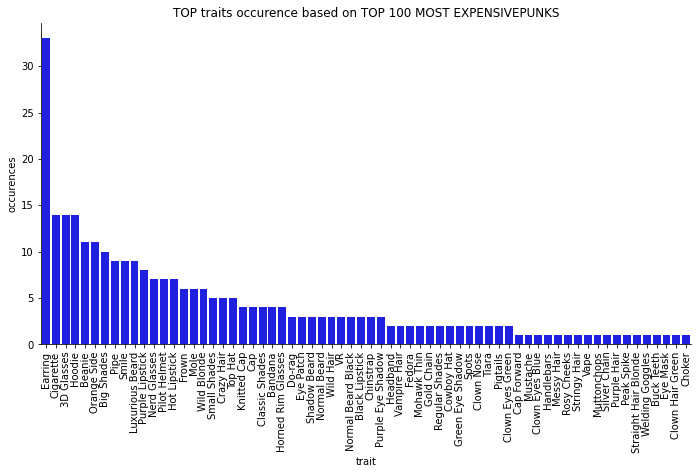

In [65]:
sns.catplot(x='trait',y='occurences',data= df_traits_caros,kind='bar',height=5, aspect=10/5,color='blue')
plt.title('TOP traits occurence based on TOP 100 MOST EXPENSIVEPUNKS')
plt.xticks(rotation=90)
plt.show()

In [66]:
order_traits_resto = dict(sorted(traits_rest.items(),key= lambda x:x[1],reverse=True))
df_traits_resto = pd.DataFrame(list(order_traits_resto.items()),columns = ['trait','occurences'])
#df_traits_humans[df_traits_humans.occurences > 1]

traits_resto = set (df_traits_resto.trait.values)
len(traits_resto),df_traits_resto.head()

(87,
           trait  occurences
 0       Earring        1438
 1     Cigarette         521
 2          Mole         411
 3  Hot Lipstick         359
 4  Nerd Glasses         342)

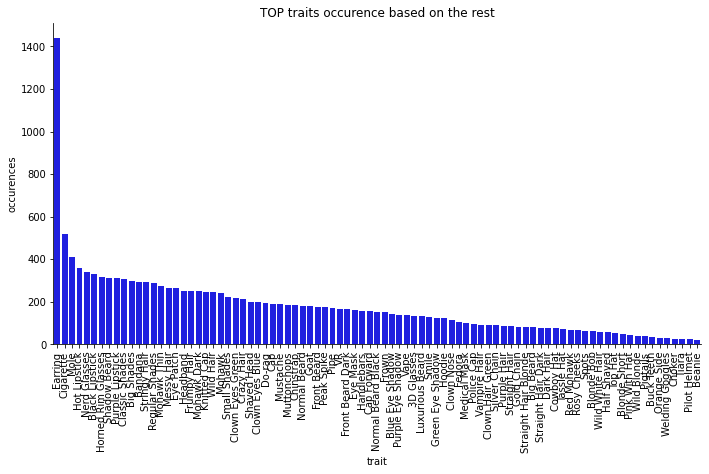

In [67]:
sns.catplot(x='trait',y='occurences',data= df_traits_resto,kind='bar',height=5, aspect=10/5,color='blue')
plt.title('TOP traits occurence based on the rest')
plt.xticks(rotation=90)
plt.show()

In [68]:
df_traits_caros.head()

,trait,occurences
0,Earring,33
1,Cigarette,14
2,3D Glasses,14
3,Hoodie,14
4,Beanie,11


In [69]:
list(traits_caros.difference(traits_resto))

[]

In [70]:
# los traits para los mas caros no son diferentes a los traits del resto

In [71]:
traits_raros = ['Beanie', 'Luxurious Beard', 'Do-rag', 'Choker', 'Gold Chain',
       'Muttonchops', 'Cowboy Hat', 'Medical Mask', 'Cap Forward',
       'Frown', 'Mustache', '3D Glasses', 'Big Beard', 'Top Hat',
       'Chinstrap', 'Clown Nose', 'Blonde Bob', 'Normal Beard', 'Smile',
       'Front Beard', 'Buck Teeth', 'Straight Hair', 'Silver Chain',
       'Spots', 'Rosy Cheeks', 'Vampire Hair', 'Tassle Hat', 'Goat',
       'Fedora', 'Police Cap', 'Hoodie', 'Eye Mask', 'Vape', 'Handlebars',
       'Pilot Helmet', 'Purple Eye Shadow', 'Tiara', 'Orange Side']

In [72]:
def atribute_present(traits):
    global traits_raros    
    lista = traits.split(',')    
    for trait in lista:
        #print(trait)
        if trait in traits_raros:
            #print(trait)
            return True
        
    return False    

In [73]:
df_counts[~(df_counts.traits.apply(atribute_present))] # atribute not present

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits
33,33,1.0,0.510000,0.51,Male,7635,Light,Peak Spike,1
118,118,2.0,20.350000,20.45,Female,9954,Light,"Bandana,Black Lipstick",2
124,124,3.0,17.300000,19.90,Male,6760,Mid,"Earring,Normal Beard Black,Peak Spike",3
138,138,4.0,14.925000,15.95,Male,9806,Light,"Horned Rim Glasses,Stringy Hair",2
160,160,3.0,41.000000,53.00,Female,612,Mid,"Clown Eyes Blue,Pigtails,Purple Lipstick",3
...,...,...,...,...,...,...,...,...,...
9971,9971,1.0,24.000000,24.00,Female,2992,Mid,"Black Lipstick,Blue Eye Shadow,Dark Hair",3
9974,9974,1.0,10.000000,10.00,Female,2488,Mid,"Blue Eye Shadow,Clown Hair Green",2
9976,9976,3.0,0.733333,1.50,Female,2139,Light,"Half Shaved,Pipe",2
9979,9979,3.0,4.066667,6.20,Male,7564,Light,"Cigarette,Earring,Nerd Glasses,Shaved Head",4


In [74]:
# vamos a analizar la venta de los que tienen atributos mas raros
df_raros = df_counts[df_counts.traits.apply(atribute_present)][df_counts.rarity<100].sort_values(by='rarity')
df_otros = df_counts[~(df_counts.traits.apply(atribute_present))][df_counts.rarity>100].sort_values(by='rarity')

df_raros = df_counts[df_counts.traits.apply(atribute_present)]
df_otros = df_counts[~(df_counts.traits.apply(atribute_present))]



<ipython-input-74-205c58af8d2d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_raros = df_counts[df_counts.traits.apply(atribute_present)][df_counts.rarity<100].sort_values(by='rarity')
<ipython-input-74-205c58af8d2d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_otros = df_counts[~(df_counts.traits.apply(atribute_present))][df_counts.rarity>100].sort_values(by='rarity')


In [75]:
df_otros

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits
33,33,1.0,0.510000,0.51,Male,7635,Light,Peak Spike,1
118,118,2.0,20.350000,20.45,Female,9954,Light,"Bandana,Black Lipstick",2
124,124,3.0,17.300000,19.90,Male,6760,Mid,"Earring,Normal Beard Black,Peak Spike",3
138,138,4.0,14.925000,15.95,Male,9806,Light,"Horned Rim Glasses,Stringy Hair",2
160,160,3.0,41.000000,53.00,Female,612,Mid,"Clown Eyes Blue,Pigtails,Purple Lipstick",3
...,...,...,...,...,...,...,...,...,...
9971,9971,1.0,24.000000,24.00,Female,2992,Mid,"Black Lipstick,Blue Eye Shadow,Dark Hair",3
9974,9974,1.0,10.000000,10.00,Female,2488,Mid,"Blue Eye Shadow,Clown Hair Green",2
9976,9976,3.0,0.733333,1.50,Female,2139,Light,"Half Shaved,Pipe",2
9979,9979,3.0,4.066667,6.20,Male,7564,Light,"Cigarette,Earring,Nerd Glasses,Shaved Head",4


25% at 0.9766666666666667, and 75% at 22.13375


<ipython-input-76-fe7ca1799a93>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raros['tipo'] = df_raros.types.map({'Male':'humano','Female':'humano','Ape':'rest','Zombie':'rest','Alien':'rest'})


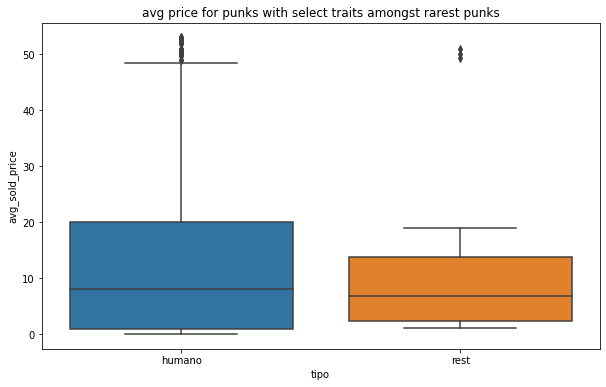

In [76]:
upper_raros, lower = outliers(df_raros, variable_to_explore)


fig,ax = plt.subplots(figsize=(10,6))
#display(df_otros.head())
#display(df_otros.types.unique())
df_raros['tipo'] = df_raros.types.map({'Male':'humano','Female':'humano','Ape':'rest','Zombie':'rest','Alien':'rest'})
sns.boxplot(x="tipo", y=variable_to_explore,data=df_raros[~(df_raros[variable_to_explore]>upper_raros)],ax=ax)
plt.title('avg price for punks with select traits amongst rarest punks')
#plt.ylim([0,900])
plt.show()

25% at 0.89625, and 75% at 19.81125


<ipython-input-77-4f3089f6be1f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_otros['tipo'] = df_otros.types.map({'Male':'humano','Female':'humano','Ape':'rest','Zombie':'rest','Alien':'rest'})


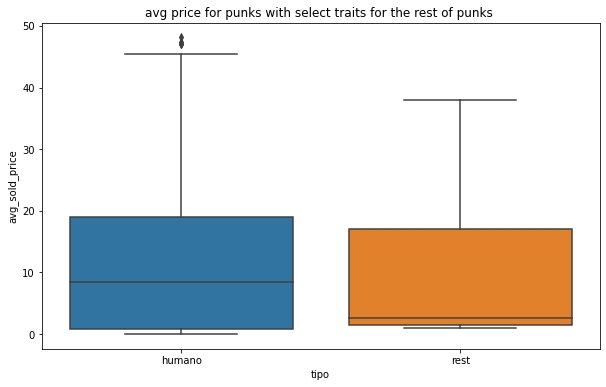

In [77]:
upper_otros, lower = outliers(df_otros, variable_to_explore)


fig,ax = plt.subplots(figsize=(10,6))
#display(df_otros.head())
#display(df_otros.types.unique())
df_otros['tipo'] = df_otros.types.map({'Male':'humano','Female':'humano','Ape':'rest','Zombie':'rest','Alien':'rest'})
sns.boxplot(x="tipo", y=variable_to_explore,data=df_otros[~(df_otros[variable_to_explore]>upper_otros)],ax=ax)
plt.title('avg price for punks with select traits for the rest of punks ')
#plt.ylim([0,900])
plt.show()

In [78]:
data1 = df_raros[~(df_raros[variable_to_explore]>upper_raros)][variable_to_explore]

data2 = df_otros[~(df_otros[variable_to_explore]>upper_otros)][variable_to_explore]


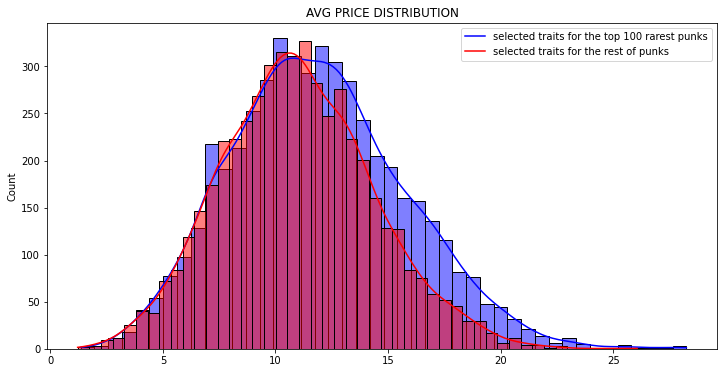

In [79]:
gix,ax = plt.subplots(figsize=(12,6))

sns.histplot(get_means_of_price(data1),color='blue',kde=True,alpha=0.5)  
sns.histplot(get_means_of_price(data2),color = 'red',kde=True)  
plt.legend(['selected traits for the top 100 rarest punks','selected traits for the rest of punks'])
plt.title('AVG PRICE DISTRIBUTION')
plt.show()

In [80]:
res = ttest_ind(a=data2,b=data1)
print(res)
alpha = 0.05    
print(f'P-value is {round(res.pvalue*100,2)}% and significance level (alpha) is 5% ')
if res.pvalue < alpha:
    print('reject NULL hypothesis, conclusion: dist are different')
else:
    print('cannot reject NULL hypothesis, conclusion: dist are equal')

Ttest_indResult(statistic=-2.940404420004247, pvalue=0.0032917594435190566)
P-value is 0.33% and significance level (alpha) is 5% 
reject NULL hypothesis, conclusion: dist are different


In [81]:
df_raros

,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits,tipo
0,0,3.0,9.193333,25.00,Female,2023,Mid,"Blonde Bob,Earring,Green Eye Shadow",3,humano
1,1,3.0,30.473333,60.00,Male,4352,Dark,"Mohawk,Smile",2,humano
14,14,3.0,1.750000,2.50,Female,155,Dark,"Hot Lipstick,Pilot Helmet,Pipe",3,humano
53,53,2.0,21.000000,22.00,Female,2825,Light,"Big Shades,Straight Hair",2,humano
89,89,3.0,13.830000,20.00,Female,125,Dark,Choker,1,humano
...,...,...,...,...,...,...,...,...,...,...
9961,9961,1.0,0.410000,0.41,Male,3525,Light,"Medical Mask,Normal Beard,Shaved Head,VR",4,humano
9963,9963,3.0,17.050000,40.00,Male,3150,Albino,"Chinstrap,Earring,Purple Hair,VR",4,humano
9965,9965,1.0,0.290000,0.29,Male,4988,Albino,"Earring,Hoodie,Nerd Glasses",3,humano
9972,9972,2.0,3.495000,5.99,Male,5312,Light,"Big Shades,Frown,Frumpy Hair",3,humano


In [82]:
df_raros['keep']= df_raros.traits.apply(atribute_present)

<ipython-input-82-cfe6debd57dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raros['keep']= df_raros.traits.apply(atribute_present)


In [83]:
df_new = df_raros[df_raros.keep == True]

In [84]:
sns.catplot(x='trait',y='occurences',data= df_new,kind='bar',height=5, aspect=10/5,color='orange')
plt.title('traits from rarest punks not amongst the top 30 most common traits')
plt.xticks(rotation=90)
plt.show()

ValueError: Could not interpret input 'trait'